In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np
import datetime as dt
import time
import os
import commands

In [2]:
ls 

auto_SMA.ipynb  id_rsa.pub     Reading PV data.ipynb  smaspot/
build/          ocr_pi.png     s2*                    SMAspot.cfg*
Desktop/        python_games/  smadata/               svalin/


227-20130724.csv
227
217-20130724.csv
217
229-20130724.csv
229
219-20130724.csv
219
213-20130724.csv
213
205-20130724.csv
205
207-20130724.csv
207
199-20130724.csv
199
209-20130724.csv
209
197-20130724.csv
197
211-20130724.csv
211
203-20130724.csv
203
223-20130724.csv
223
215-20130724.csv
215


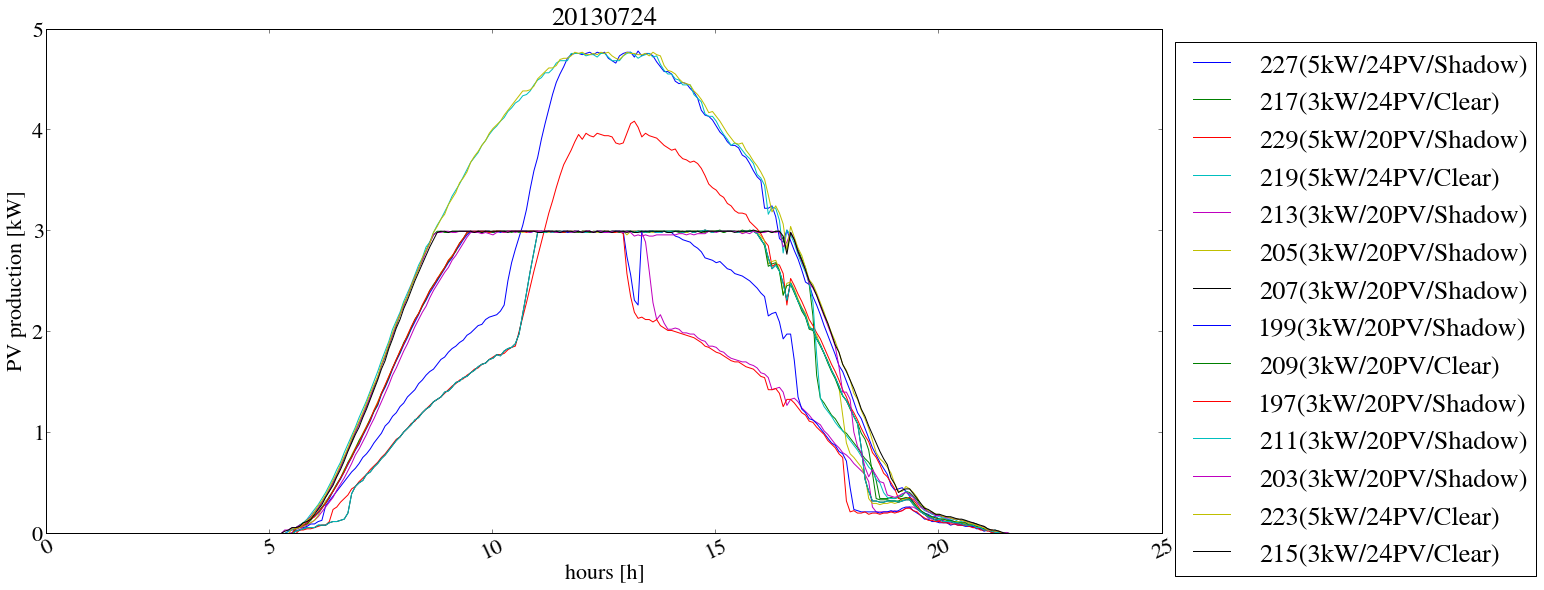

In [31]:
figsize(20,10)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

lab = {'227':'5kW/24PV/Shadow',
       '223':'5kW/24PV/Clear',
       '229':'5kW/20PV/Shadow',
       '217':'3kW/24PV/Clear',
       '219':'5kW/24PV/Clear',       
       '225':'5kW/20PV/Shadow',
       '207':'3kW/20PV/Shadow',
       '209':'3kW/20PV/Clear',
       '215':'3kW/24PV/Clear',
       '213':'3kW/20PV/Shadow',
       '211':'3kW/20PV/Shadow',
       '205':'3kW/20PV/Shadow',
       '203':'3kW/20PV/Shadow',
       '199':'3kW/20PV/Shadow',
       '197':'3kW/20PV/Shadow'}

date='20130724'

matplotlib.rc('font', **font)
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
ax=plt.gca()
for f in os.listdir('./smadata/2013/'):
    if date in f and 'Spot' not in f:
        print f
        hus = f.split('-')[0]
        print hus
        data = pd.read_csv('./smadata/2013/'+f, header=8, sep=';', parse_dates={'time':[0]})
        timed = [(i.hour+i.minute/60.0) for i in data.time]
        plot(timed, data.kW, label=hus+'('+lab[hus]+')')
legend(loc = 'upper left', bbox_to_anchor = (1.0, 1.0))
xlabel('hours [h]')
ylabel('PV production [kW]')
title(date)

Loading the data

In [22]:

date = '201307'

data = []
dataname = []
for f in os.listdir('./smadata/2013/'):
    if date+'.csv' in f and 'swp' not in f and 'swo' not in f:
        print f
        hus = f.split('-')[0]
        print hus
        data.append( pd.read_csv('./smadata/2013/'+f, header=8, sep=';', parse_dates={'time':[0]} , dayfirst=True))
        dataname.append(hus)
        


205-201307.csv
205
217-201307.csv
217
213-201307.csv
213
219-201307.csv
219
223-201307.csv
223
207-201307.csv
207
227-201307.csv
227
215-201307.csv
215
209-201307.csv
209
3-201307.csv
3
2-201307.csv
2
211-201307.csv
211
203-201307.csv
203
229-201307.csv
229


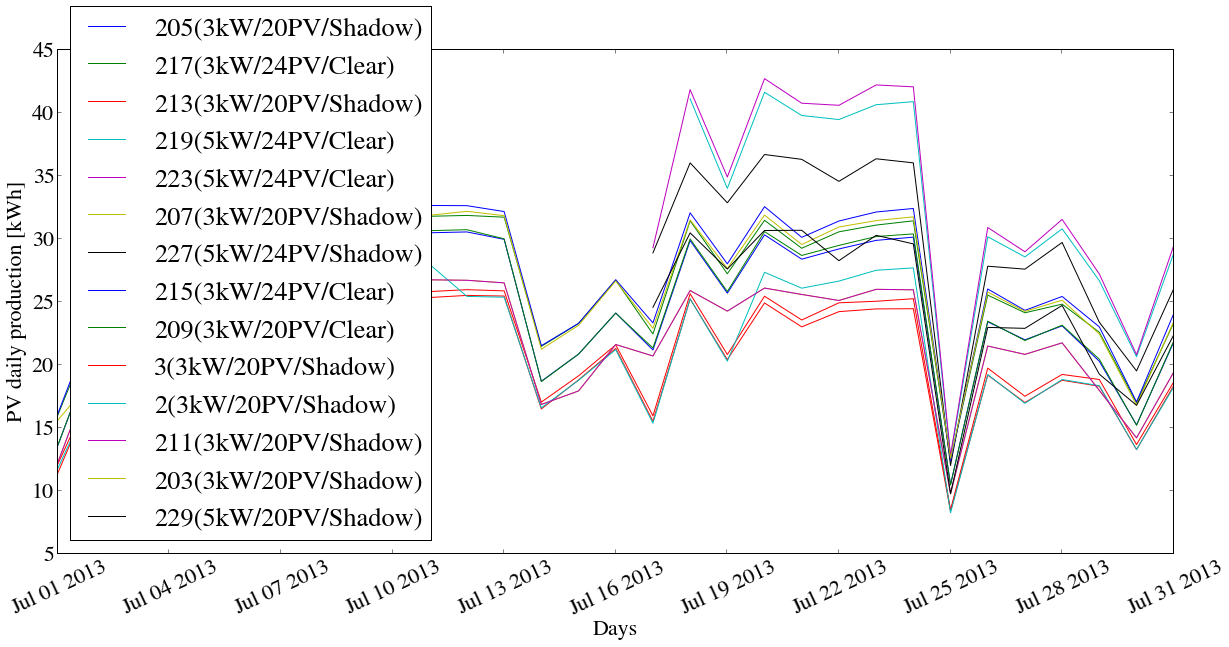

In [23]:
figsize(20,10)
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
ax=plt.gca()
for i in range(len(data)):
    plot(data[i]['time'], data[i]['kWh.1'], label=dataname[i] + '('+lab[dataname[i]]+')')
ylabel('PV daily production [kWh]')
xlabel('Days')
legend(loc=3)

In [24]:
legend?